1.1. Теоретический материал - Линейные регрессионные модели
Линейная регрессия
Линейная регрессия (Linear regression) – модель зависимости переменной 
x от одной или нескольких других переменных (факторов, регрессоров, 
независимых переменных) с линейной функцией зависимости. Линейная 
регрессия относится к задаче определения «линии наилучшего соответствия» 
через набор точек данных и стала простым предшественником нелинейных 
методов, которые используют для обучения нейронных сетей.
Цель линейной регрессии — поиск линии, которая наилучшим образом 
соответствует этим точкам. Напомним, что общее уравнение для прямой есть 
𝑓 (𝑥) = 𝑏 + 𝑚 ⋅ 𝑥 +, где 𝑚 – наклон линии, а 𝑏 – его сдвиг.
Функция потерь — метод наименьших квадратов
Функция потерь – это мера количества ошибок, которые наша линейная 
регрессия делает на наборе данных. Хотя есть разные функции потерь, все они 
вычисляют расстояние между предсказанным значением 𝑦(х) и его 
фактическим значением.
Одна очень распространенная функция потерь называется средней 
квадратичной ошибкой MSE. Чтобы вычислить MSE, мы просто берем все 
значения ошибок, считаем их квадраты длин и усредняем.
Задача экраполяции
Допустим у нас есть много экспериментальных точек. Необходимо через 
них провести кривую, которая как можно ближе проходила к этим точкам. При 
этом необходимо минимизировать среднюю квадратичную ошибку (MSE).
Для решения данной задачи в Python есть множество библиотек. Самыми 
распостраненными выступают:
numpy - numpy.linalg.lstsq
scipy - scipy.linalg (содержит все функции из numpy.linalg плюс часть 
новых функций, которых нет в numpy.linalg).


1.1.1 Пример
Задача: Проведем прямую 𝑦 = 𝑚𝑥 + 𝑏 через экспериментальные точки.

0.9999999999999997 -0.9499999999999992


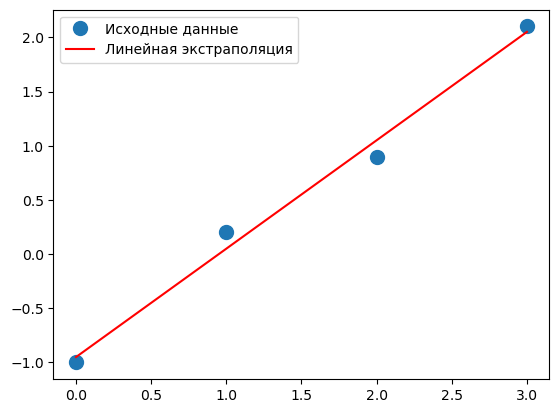

In [2]:
import numpy as np
x = np.array([0, 1, 2, 3])
y = np.array([-1, 0.2, 0.9, 2.1])

#Перепишем линейное уравнение y = mx + c как у = Ар, где А = [[ x1 ]] u p = [[m], [c]]
#Построим А по х:

A = np.vstack([x, np.ones(len(x))]).T
A

#Используем метод lstsq для решения его относительно вектора р
m, c = np.linalg.lstsq(A, y, rcond = None)[0]
print(m, c)

#Построим график полученной прямой и укажем на нем точки
import matplotlib.pyplot as plt
plt.plot(x, y, 'o', label = 'Исходные данные', markersize = 10)
plt.plot(x, m * x + c, 'r', label = 'Линейная экстраполяция')
plt.legend()
plt.show()

1.1.2 Пример
Задача: Пусть 𝑥, 𝑦 – вектора длиной 𝑛 > 3 (точек > 3). Задача заключается в 
построении эстраполяционного полинома второго порядка (параболы). Таким 
образом, необходимо найти такие коэффициенты поринома 𝑎, 𝑏, 𝑐 по методу 
наименьших квадратов. Данные мтогут быть получены в результате 
измерений. Покажем пример генерации данных случайным образом и 
загрузки их из файла.

[-5.35327903 -3.97846185 -2.89300635 -1.58663064 -0.85209179  0.15965695
  1.07045722  2.22099206  2.84277451  3.82338078  5.38477637]
[25.06901441 16.40567393  9.21085663  4.02877936  1.3004112   0.22457783
  1.0817456   4.22014228  8.82431397 16.35292318 24.95968696]


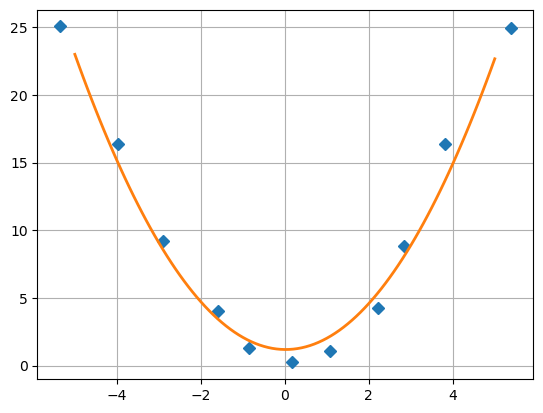

In [3]:
from numpy import *
from numpy.random import *
import numpy as np
import matplotlib.pyplot as plt
#генерируем рандомные x u y
delta = 1.0
x = linspace(-5,5,11)
y = x**2+delta*(rand(11)-0.5)
x += delta * (rand(11)-0.5)

#записываем данные в файл
x.tofile('x_data.txt', '\n')
y.tofile('y_data.txt', '\n')

#читаем данные из файлов
x = fromfile('x_data.txt', float, sep = '\n')
y = fromfile('y_data.txt', float, sep = '\n')

print(x)
print(y)

#Нахождение коэффициентов функции вида ax^2 + bx + c методом наименьших квадратов
#Задаем вектор ь = [x**2, x, E]
m = vstack((x**2, x, ones(11))).T
#Находим коэффициенты при составляющих вектора m
s = np.linalg.lstsq(m, y, rcond = None)[0]

#На отрезке [-5, 5]
x_prec = linspace(-5, 5, 101)
#Рисуем точки
plt.plot(x, y, 'D')
#Рисуем кривую вида y = ax^2 + bx + c, подставляя из решения коэффициенты s[0], s[1], s[2]
plt.plot(x_prec, s[0] * x_prec ** 2 + s[1] * x_prec + s[2], '-', lw = 2)
plt.grid()
plt.savefig('парабола.png')

Пример 1.1.3
Задача: По данным предыдущего примера постройте эстраполяционного полинома 
третьего порядка

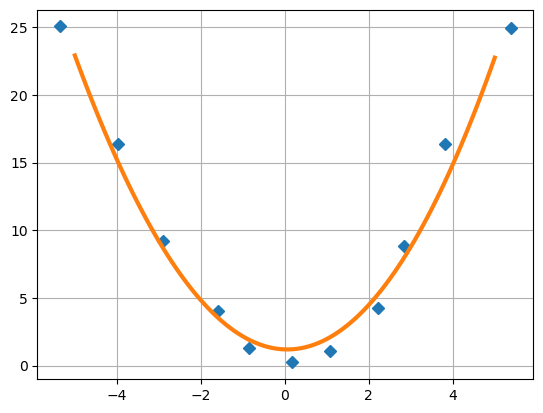

In [4]:
#Нахождение коэффициентов функции вида y = ax^3 + bx^2 + cx + d методом наименьших квадратов
#Задаем вектор m = [x**3, x, E]
m = vstack((x**3, x**2, x, ones(11))).T
#Находим коэффициенты при составляющих вектора m
s = np.linalg.lstsq(m, y, rcond = None)[0]

#На отрезке [-5, 5]
x_prec = linspace(-5, 5, 101)
#Рисуем точки
plt.plot(x, y, 'D')
#Рисуем кривую вида y = ax^3 + bx^2 + cx + d, подставляя из решения коэффициенты s[0], s[1], s[2], s[3]
plt.plot(x_prec, x_prec**3 * s[0] + x_prec **2 * s[1] + x_prec * s[2] + s[3], '-', lw = 3)
plt.grid()
plt.savefig('полином 3-й степени.png')

Задание
Задача: Представьте собственные данные и постройте эктраполяцию полиномами 
первой, второй и третьей степени.

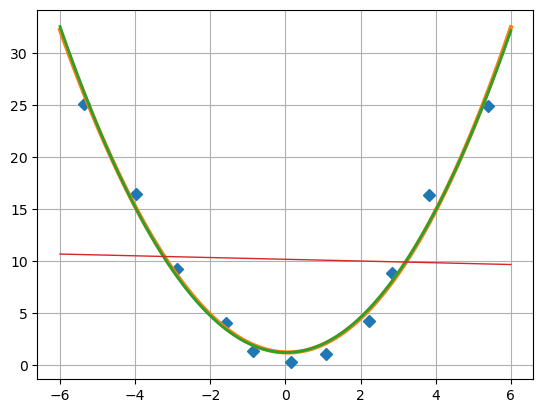

In [5]:
m1 = vstack((x, ones(11))).T
m2 = vstack((x**2, x, ones(11))).T
m3 = vstack((x**3, x**2, x, ones(11))).T

s1 = np.linalg.lstsq(m1, y, rcond=None)[0]
s2 = np.linalg.lstsq(m2, y, rcond=None)[0]
s3 = np.linalg.lstsq(m3, y, rcond=None)[0]

x_prec = linspace(-6, 6, 101)

plt.plot(x, y, 'D')
plt.plot(x_prec, x_prec**3 * s3[0] + x_prec **2 * s3[1] + x_prec * s3[2] + s3[3], '-', lw = 3)
plt.plot(x_prec, s2[0] * x_prec ** 2 + s2[1] * x_prec + s2[2], '-', lw = 2)
plt.plot(x_prec, s1[0] * x_prec + s1[1], '-', lw = 1)
plt.grid()
plt.savefig('полиномы.png')

1.1.4 Пример
Задача: Необходимо проверить гипотезу, что наши точечно заданная функция ложится 
на кривую вида 𝑓(𝑥, 𝑏) = 𝑏0 + 𝑏1𝑒𝑥𝑝(−𝑏2𝑥^2)

0.00021620574947655788
0.10731129707873695
[0.         0.10204082 0.20408163 0.30612245 0.40816327 0.51020408
 0.6122449  0.71428571 0.81632653 0.91836735 1.02040816 1.12244898
 1.2244898  1.32653061 1.42857143 1.53061224 1.63265306 1.73469388
 1.83673469 1.93877551 2.04081633 2.14285714 2.24489796 2.34693878
 2.44897959 2.55102041 2.65306122 2.75510204 2.85714286 2.95918367
 3.06122449 3.16326531 3.26530612 3.36734694 3.46938776 3.57142857
 3.67346939 3.7755102  3.87755102 3.97959184 4.08163265 4.18367347
 4.28571429 4.3877551  4.48979592 4.59183673 4.69387755 4.79591837
 4.89795918 5.        ]
[1.00123123 0.95336023 1.00071508 0.96803942 0.90363969 0.90326908
 0.91537039 0.76799243 0.80753074 0.71717576 0.73540105 0.63187829
 0.61470632 0.59735066 0.50915518 0.42490002 0.450023   0.3997942
 0.32139799 0.35113057 0.32639824 0.36502187 0.34441335 0.31037803
 0.326816   0.19096244 0.26695289 0.30571632 0.28739997 0.26961073
 0.17379148 0.27161187 0.33414438 0.25777661 0.35315732 0.18441

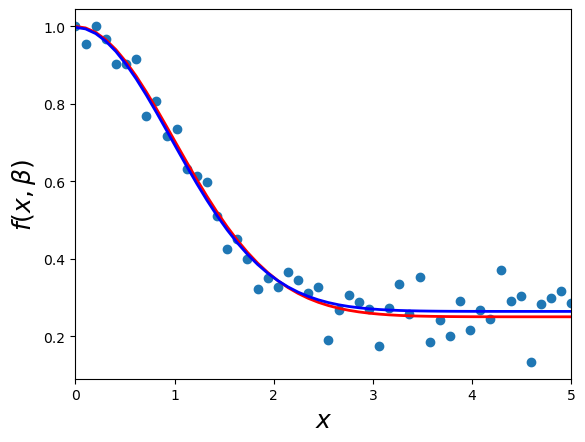

In [6]:
#Добавим шума в данные, сделанные по функции f(x,b) с коэффициентом b = (0.25, 0.75, 0.5)
beta = (0.25, 0.75, 0.5)
def func(x, b0, b1, b2):
    return b0 + b1 * np.exp(-b2*x**2)

#Зададим массив точек xi
xdata = np.linspace(0, 5, 50)
#Создаем теоретически правильные значения точек (без шума)
y = func(xdata, *beta)
#Зашумляем эти данные 
ydata = y + 0.05 * np.random.randn(len(xdata))
#Используем функцию для получения решения в виде коэффициентов функции f(x) для указанных xdata и ydata
from scipy.optimize import curve_fit
beta_opt, beta_cov = curve_fit(func, xdata, ydata)
beta_opt

#Вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)

#Вычислим квадратичное отклонение
residuals = ydata - func(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw = 2)
ax.plot(xdata, func(xdata, *beta_opt), 'b', lw = 2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize = 18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize = 18)

print(xdata)
print(ydata)

1.1.5 Пример
Задача: Необходимо проверить гипотезу, что наши точечно заданная функция ложится 
на кривые вида: 
1) 𝑓(𝑥, 𝑏) = 𝑏0 + 𝑏1𝑥
2) 𝑓(𝑥, 𝑏) = 𝑏0 + 𝑏1𝑥 + 𝑏2𝑥^2
3) 𝑓(𝑥, 𝑏) = 𝑏0 + 𝑏1𝑙𝑛(𝑥)
4) 𝑓(𝑥, 𝑏) = 𝑏0 𝑥^b1

[0.22853908 0.75753948]
0.00012568947362228571
0.11052005426661038


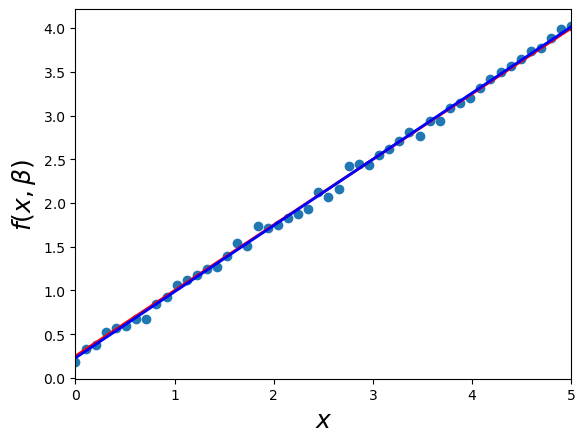

0.00012568947362228571
0.10707097772036063


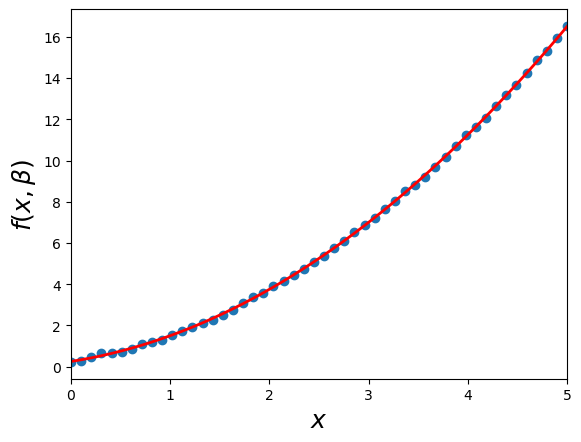

[1.01961868 1.99716989]
6.30562793756181e-05
0.14581394947403162


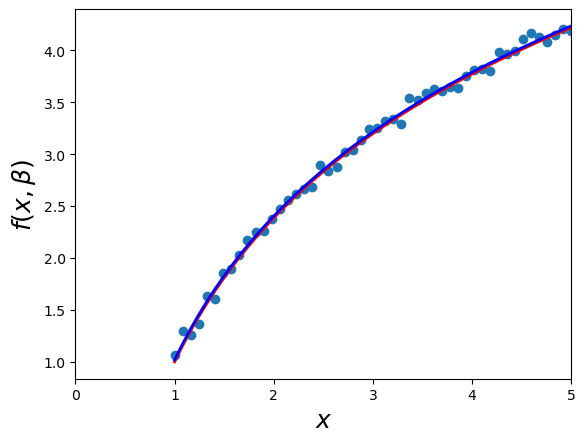

[1.00641164 1.99519342]
6.174317815499267e-06
0.14351748696824868


Text(0, 0.5, '$f(x, \\beta)$')

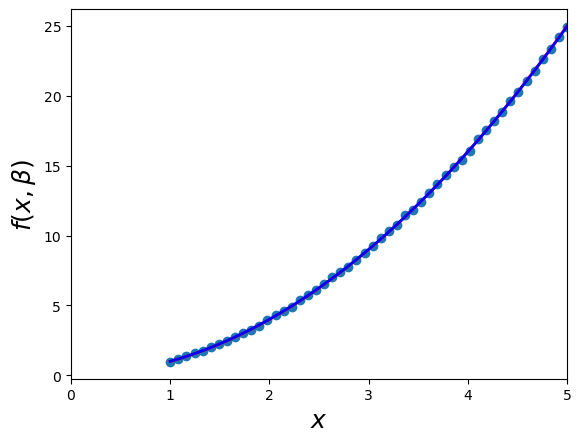

In [7]:
#Решение
#1
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
#Добавим шума в данные, сделанные по функции f(x,b) с коэффициентами b = (0.25, 0.75)
beta = (0.25, 0.75)
def f(x, b0, b1):
    return b0 + b1 * x
#зададим массив точек xi
xdata = np.linspace(0, 5, 50)
#создаем теоретически правильные значения точек yi (без шума)
y = f(xdata, *beta)
#зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print(beta_opt)
#Вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)

#Вычислим квадратичное отклонение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)
fig , ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw = 2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw = 2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()
#Решение
#2
#Добавим шума в данные, сделанные по функции f(x,b) с коэффициентами b = (0.25, 0.75, 0.5)
beta = (0.25, 0.75, 0.5)
def f(x, b0, b1, b2):
    return b0 + b1 * x + b2 * x * x
#зададим массив точек xi
xdata = np.linspace(0, 5, 50)
#cоздаем теоретически правильные значения точек yi (без шума)
y = f(xdata, *beta)
#зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print(lin_dev)

#Вычислим квадратичное отклонение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.set_xlim(0,5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

#Решение
#3
#Добавим шума в данные, сделанные по функции f(x,b) с коэффициентами b = (1, 2)
beta = (1, 2)
def f(x, b0, b1):
    return b0 + b1 * np.log(x)
#Зададим массив точек xi
xdata = np. linspace(1, 5, 50)
#Создаем теоретически правильные значения точек yi (без шума)
y = f(xdata, *beta)
#зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print(beta_opt)
#Вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)

#Вычислим квадратичное отелонение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

#Решение
#4
#Добавим шума в данные, сделанные по функции f(x,b) с коэффициентами b = (1,2)
beta = (1, 2)
def f(x, b0, b1):
    return b0 * x ** b1
#зададим массив точек xi
xdata = np.linspace(1, 5, 50)
#создаем теоретически правильные значения точек yi (без шума)
y = f(xdata, *beta)
#зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print(beta_opt)
#Вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)

#Вычислим квадратичное отклонение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0,5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)


Задание: Подставьте собственные данные и поэкспериментируйте с представленными 
функциями. Проанализируйте динамику изменения данных.

[0.98570486 0.99239921]
0.00011330838285092165
0.09963323284214995


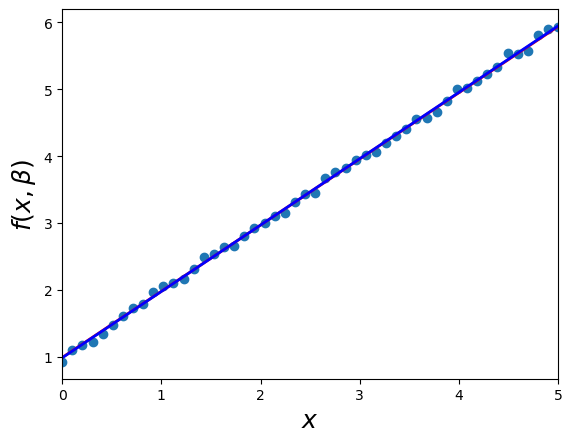

0.00011330838285092165
0.0964036938711822


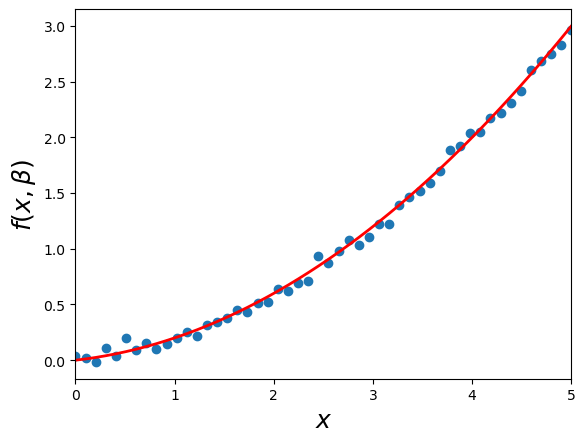

[2.00266244 1.9992013 ]
4.871255168245427e-05
0.11264492282261937


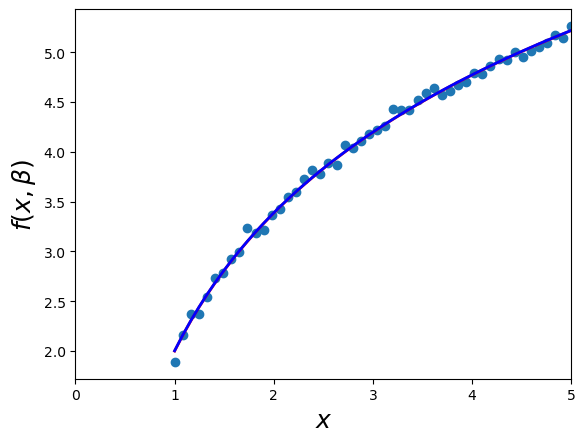

[5.00006208 3.99999066]
1.7274684388091516e-07
0.14749115333006887


Text(0, 0.5, '$f(x, \\beta)$')

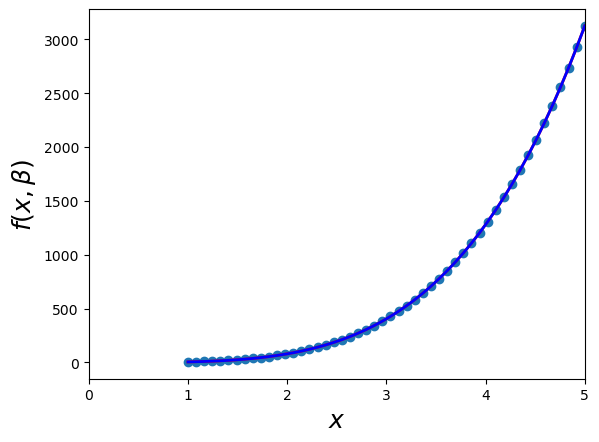

In [8]:
#Решение
#1
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
#Добавим шума в данные, сделанные по функции f(x,b) с коэффициентами b = (0.25, 0.75)
beta = (0.99, 0.99)
def f(x, b0, b1):
    return b0 + b1 * x
#зададим массив точек xi
xdata = np.linspace(0, 5, 50)
#создаем теоретически правильные значения точек yi (без шума)
y = f(xdata, *beta)
#зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print(beta_opt)
#Вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)

#Вычислим квадратичное отклонение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)
fig , ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw = 2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw = 2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()
#Решение
#2
#Добавим шума в данные, сделанные по функции f(x,b) с коэффициентами b = (0.25, 0.75, 0.5)
beta = (0., 0.1, 0.1)
def f(x, b0, b1, b2):
    return b0 + b1 * x + b2 * x * x
#зададим массив точек xi
xdata = np.linspace(0, 5, 50)
#cоздаем теоретически правильные значения точек yi (без шума)
y = f(xdata, *beta)
#зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print(lin_dev)

#Вычислим квадратичное отклонение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.set_xlim(0,5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

#Решение
#3
#Добавим шума в данные, сделанные по функции f(x,b) с коэффициентами b = (1, 2)
beta = (2, 2)
def f(x, b0, b1):
    return b0 + b1 * np.log(x)
#Зададим массив точек xi
xdata = np. linspace(1, 5, 50)
#Создаем теоретически правильные значения точек yi (без шума)
y = f(xdata, *beta)
#зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print(beta_opt)
#Вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)

#Вычислим квадратичное отелонение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

#Решение
#4
#Добавим шума в данные, сделанные по функции f(x,b) с коэффициентами b = (1,2)
beta = (5, 4)
def f(x, b0, b1):
    return b0 * x ** b1
#зададим массив точек xi
xdata = np.linspace(1, 5, 50)
#создаем теоретически правильные значения точек yi (без шума)
y = f(xdata, *beta)
#зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print(beta_opt)
#Вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)

#Вычислим квадратичное отклонение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0,5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)


1.2 Теоретический материал - Задачи регрессии
Линейная регрессия - это широко используемый метод статистического 
анализа, который использует регрессионный анализ в математической 
статистике для определения количественной взаимосвязи между двумя или 
более переменными. Если регрессионный анализ включает две или более 
независимых переменных, а связь между зависимой и независимой 
переменными является линейной, тогда имееи дело с множественной линейной 
регрессией.
В этом разделе мы увидим, как библиотеку Scikit-Learn в Python для машинного 
обучения можно использовать для реализации функций регрессии. Мы начнем 
с простой линейной регрессии с участием двух переменных, а затем перейдем к 
линейной регрессии с участием нескольких переменных.

1.2.1 Пример
Задача: Построим простую линейную регрессию в Python с использованием 
библиотеки scikit-learn

(20, 2)


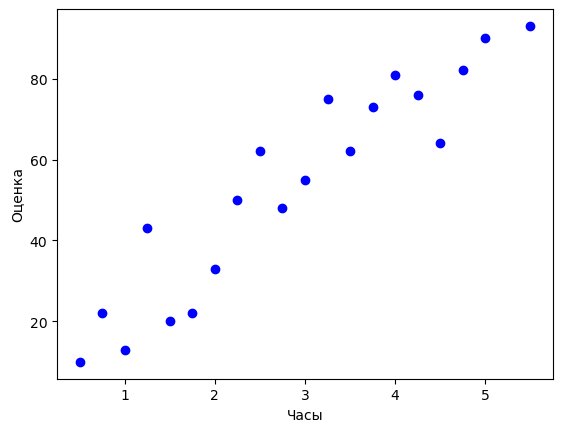

In [10]:
#Импортируем необходимые библиотеки
#Используем pandas и numpy для обработки данных
#matplotlib для визуализации и sklearn для обучения наборов данных и импорта моделей
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame, Series
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
#Создадим набор данных для описания взаимосвязи между временем обучения студентов и успеваемостью
my_dict = {'Учебное время': [0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 2.00,
                             2.25, 2.50, 2.75, 3.00, 3.25, 3.50, 3.75,
                             4.00, 4.25, 4.50, 4.75, 5.00, 5.50],
           'Оценка': [10, 22, 13, 43, 20, 22, 33, 50, 62, 48, 55, 75,
                      62, 73, 81, 76, 64, 82, 90, 93]}
dataset = pd.DataFrame(my_dict)
dataset.head()
#Исследуем набор данных
print(dataset.shape)
dataset.describe()
#Нарисуем точечную диграмму
plt.scatter(dataset['Учебное время'], dataset['Оценка'], color = 'b', label = "данные экзамена")
plt.xlabel("Часы")
plt.ylabel("Оценка")
plt.show()

После того как мы получили представление о данных, разделим информацию 
на «атрибуты» и «метки». Атрибуты – это независимые переменные, а метки 
– это зависимые переменные, значения которых должны быть предсказаны. В 
нашем наборе всего два столбца и необходимо предсказать оценку в 
зависимости от количества часов. Чтобы извлечь атрибуты и метки, 
выполните следующий скрипт:

In [11]:
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:, 1].values
print(x)
print(y)
#Теперь когда у нас есть атрибуты и метки, необходимо разделить их на обучающий и тестовый наборы
#Приведенный фрагмент разделяет 80% данных на обучающий набор, а 20% данных - на набор тестов
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state= 0)
#Далее можно обучить алгоритм линейной регрессии
#Необходимо импортировать класс LinearRegression, создать его экземпляр и вызвать метод fit()
regressor = LinearRegression()
regressor.fit(x_train, y_train)
#Приведем получившиеся коэффициенты для линии регрессии
print(regressor.intercept_)
print(regressor.coef_)

[[0.5 ]
 [0.75]
 [1.  ]
 [1.25]
 [1.5 ]
 [1.75]
 [2.  ]
 [2.25]
 [2.5 ]
 [2.75]
 [3.  ]
 [3.25]
 [3.5 ]
 [3.75]
 [4.  ]
 [4.25]
 [4.5 ]
 [4.75]
 [5.  ]
 [5.5 ]]
[10 22 13 43 20 22 33 50 62 48 55 75 62 73 81 76 64 82 90 93]
3.1686320754716846
[17.18867925]


Получившийся результат можно интерпретировать следующим образом: с 
каждым затраченным часом на обучение результат экзамена повышается 
приблизительно на 17 баллов. Далее можно построить прогнозы. Для этого мы 
будем использовать наши тестовые данные и посмотрим, насколько точно наш 
алгоритм предсказывает процентную оценку. Чтобы сделать прогноз на 
тестовых данных необходимо выполнить следующий код

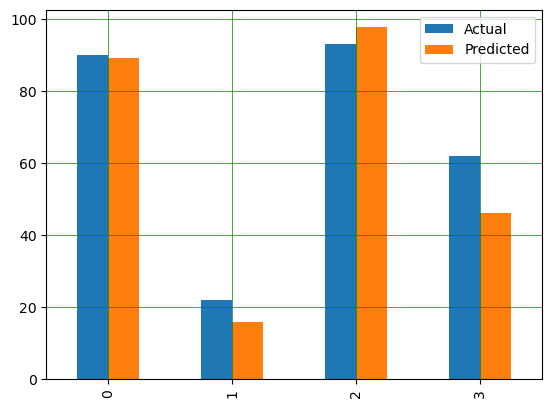

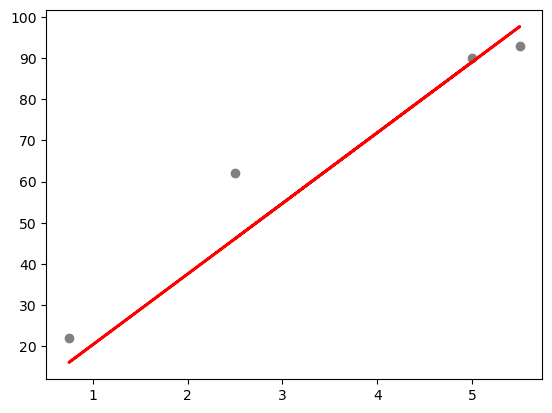

In [12]:
y_pred = regressor.predict(x_test)
#Сравним фактические значения с прогнозируемыми
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df
#Визуализируем результат сравнения в виде гистограммы
df.plot(kind='bar')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()
#Построим линию регрессии с тестовыми данными
plt.scatter(x_test, y_test, color='gray')
plt.plot(x_test, y_pred, color = "red", linewidth=2)
plt.show()

1.3. Теоретический материал - Множественная регрессия
В предыдущем примере мы проиллюстрировали линейную регрессию 
с двумя переменными. Однако, почти все реальные задачи имеют больше 
параметров. Линейная регрессия с участием нескольких переменных 
называется «множественной линейной регрессией» или многомерной 
линейной регрессией. Шаги для выполнения множественной линейной 
регрессии аналогичны шагам для простой . Разница заключается в оценке. 
Вы можете использовать множественную регрессию, чтобы узнать, какой 
фактор оказывает наибольшее влияние на прогнозируемый результат или 
как различные переменные связаны друг с другом.

Задание: Постройте модель линейной регрессии для произвольных данных из двух 
столбцов. Для примера можно взять точечную зависимость заработной платы от 
опыта работы:
(https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linearregression/master/Salary_Data.csv). 
Найдите коэффициенты линии регрессии. Постройте прогноз.

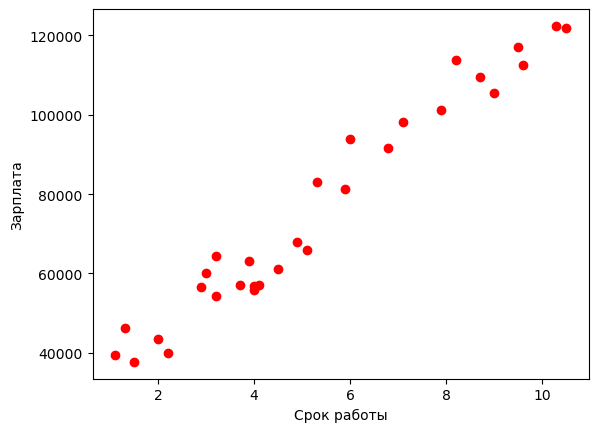

Intercept: 26780.09915062818 Coef:  9312.575126729189


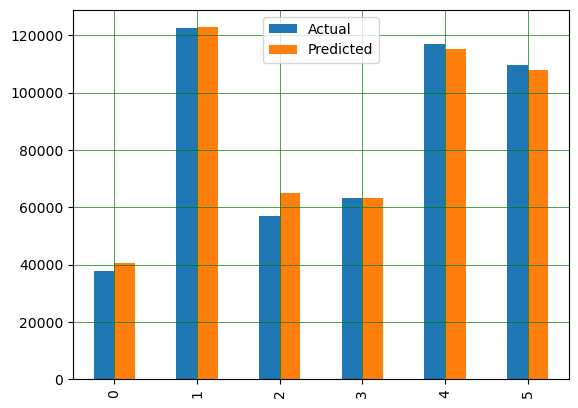

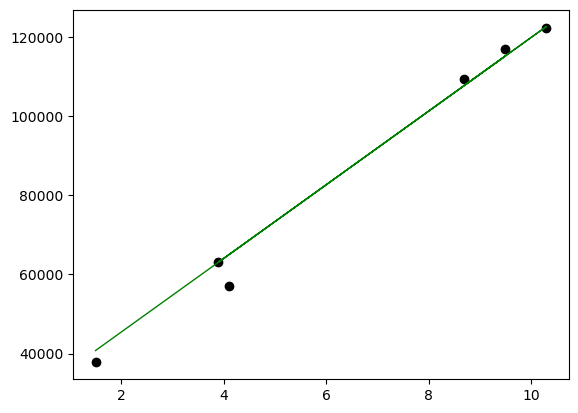

,Actual,Predicted
0,37731.0,40748.961841
1,122391.0,122699.622956
2,57081.0,64961.657170
3,63218.0,63099.142145
4,116969.0,115249.562855
5,109431.0,107799.502753


In [33]:
import csv 

YearsExperience = []
Salary = []
url = 'https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv'
df = pd.read_csv(url)
list1 = df.to_numpy()
for i in list1:
    YearsExperience.append(i[0])
    Salary.append(i[1])
#Добавь в словарь массивы с ключами, соответствующим их именам
my_dict = {'YearsExpirience': YearsExperience, 'Salary': Salary}
dataset = pd.DataFrame(my_dict)
plt.scatter(dataset['YearsExpirience'], dataset['Salary'], color = 'r', label = 'данные з/п')
plt.xlabel("Срок работы")
plt.ylabel("Зарплата")
plt.show()
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state = 0)
regressor = LinearRegression()
regressor.fit(x_train, y_train)
print(f'Intercept: {regressor.intercept_} Coef:  {float(regressor.coef_)}') #intercept - одномерный массви с элементом b0 интерпаляционной формулы
#coef - массив с элементом b1 интерполяционной формулы
y_pred = regressor.predict(x_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.plot(kind='bar')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()
plt.scatter(x_test, y_test, color='black')
plt.plot(x_test, y_pred, color = 'green', linewidth = 1)
plt.show()
df

1.3.1 Пример
Задача:
Для решения задачи множественной регрессии можно задействовать уже 
известный метод numpy.linalg.lstsq.

In [18]:
import numpy as np

y = [1,2,3,4,3,4,5,3,5,5,4,5,4,5,4,5,6,0,6,3,1,3,1]
x = [[0,2,4,1,5,4,5,9,9,9,3,7,8,8,6,6,5,5,5,6,6,5,5],
     [4,1,2,3,4,5,6,7,5,8,7,8,7,8,7,8,6,8,9,2,1,5,6],
     [4,1,2,5,6,7,8,9,7,8,7,8,7,4,3,1,2,3,4,1,3,9,7]]
x = np.transpose(x) #транспонировать таким образом входные векторы
x =np.c_[x, np.ones(x.shape[0])] #добавить термин смещения
linreg = np.linalg.lstsq(x, y, rcond=None)[0]
print(linreg)

[ 0.1338682   0.26840334 -0.02874936  1.5122571 ]


Кроме этого можно использовать возможности библиотеки sсikit-learn. 
Рассмотрим пример.

1.3.2 Пример
Задача: Для данных из предыдущей задачи построить модель множественной 
линейной регрессии с использованием средств библиотеки sсikit-learn.

In [2]:
#Импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

y = [1,2,3,4,3,4,5,3,5,5,4,5,4,5,4,5,6,0,6,3,1,3,1]
x = [[0,2,4,1,5,4,5,9,9,9,3,7,8,8,6,6,5,5,5,6,6,5,5],
     [4,1,2,3,4,5,6,7,5,8,7,8,7,8,7,8,6,8,9,2,1,5,6],
     [4,1,2,5,6,7,8,9,7,8,7,8,7,4,3,1,2,3,4,1,3,9,7]]

#формируем DataFrame из двух списков
new_y = np.array(y)
new_y = new_y.transpose()
df1 = pd.DataFrame(new_y)
new_x = np.array(x)
new_x = new_x.transpose()
df2 = pd.DataFrame(new_x)
df1 = df1.rename(columns= {0: 'y'}, inplace=False)
df2 = df2.rename(columns= {0: 'x1', 1: 'x2', 2: 'x3'}, inplace = False)

frames = [df1, df2]
dataset = pd.concat([df1, df2], axis=1, join="inner")
dataset.head()

#изучим данные
print(dataset.shape)
dataset.describe()
#разделим данные на метки и атрибуты
x = dataset[['x1', 'x2', 'x3']]
y = dataset['y']
#разделим данные на обучающую и тестовую выборки
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
#для обучения алгоритма мы выполняем тот же код, что и раньше, используя метод fit() класса LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)
#выведем коэффициенты модели
coeff_df = pd.DataFrame(regressor.coef_, x.columns, columns=['Coefficient'])
coeff_df
#Чтобы сделать прогнозы на тестовых данных, выполните следующий код
y_pred = regressor.predict(x_test)
df = pd.DataFrame({'Actual': y_test, 'Predict': y_pred})
df.head()
#Последний шаг - оценить производительность алгоритмов. Мы сделаем это, найдя значения для MSE
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

(23, 4)
Mean Squared Error: 1.327269924234307


Задание
Задача: Постройте модель множественной линейной регрессии для произвольных 
данных из нескольких столбцов. Для примера можно взять потребления 
газа (в миллионах галлонов) в 48 штатах США или набор данных о 
качестве красного вина (1) и (2) соответственно. Найдите коэффициенты 
множественной регрессии. Постройте прогноз.
1. 
https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/pe
trol_consumption.csv
2. https://raw.githubusercontent.com/aniruddhachoudhury/Red-WineQuality/master/winequality-red.csv

In [5]:
import csv

url = r"https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/petrol_consumption.csv"
dataframe = pd.read_csv(url, on_bad_lines='skip')
Petrol_tax = dataframe.iloc[:, 0].values #pt
Average_income = dataframe.iloc[:, 1].values #ai
Paved_Highways = dataframe.iloc[:, 2].values #ph
Population_Driver_licence = dataframe.iloc[:, 3].values #pdl
Petrol_Consumption = dataframe.iloc[:, 4].values #pc

new_pt = np.array(Petrol_tax)
new_pt = new_pt.transpose()
df_pt = pd.DataFrame(new_pt)

new_ai = np.array(Average_income)
new_ai = new_ai.transpose()
df_ai = pd.DataFrame(new_ai)

new_ph = np.array(Paved_Highways)
new_ph = new_ph.transpose()
df_ph = pd.DataFrame(new_ph)

new_pdl = np.array(Population_Driver_licence)
new_pdl = new_pdl.transpose()
df_pdl = pd.DataFrame(new_pdl)

new_pc = np.array(Petrol_Consumption)
new_pc = new_pc.transpose()
df_pc = pd.DataFrame(new_pc)

df_pt = df_pt.rename(columns = {0: 'Petrol tax'}, inplace = False)
df_ai = df_ai.rename(columns = {0: 'Average income'}, inplace = False)
df_ph = df_ph.rename(columns = {0: 'Paved Highways'}, inplace = False)
df_pdl = df_pdl.rename(columns = {0: 'Population Driver licence'}, inplace = False)
df_pc = df_pc.rename(columns = {0: 'Petrol Consumption'}, inplace = False)

frames = [df_pt, df_ai, df_ph, df_pdl, df_pc]
dataset = pd.concat(frames, axis=1, join="inner")
dataset
x = dataset[['Petrol tax', 'Average income', 'Paved Highways', 'Population Driver licence']]
y = dataset['Petrol Consumption']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(x_train, y_train)

coeff_df = pd.DataFrame(regressor.coef_, x.columns, columns=['Coefficient'])
y_pred = regressor.predict(x_test)
df = pd.DataFrame({'Actual': y_test, 'Predict': y_pred})

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_pred))


Mean Squared Error:  4666.344787588363


,Coefficient
Petrol tax,-40.016660
Average income,-0.065413
Paved Highways,-0.004741
Population Driver licence,1341.862121


In [6]:
df

,Actual,Predict
29,534,469.391989
4,410,545.645464
26,577,589.668394
30,571,569.730413
32,577,649.774809
37,704,646.631164
34,487,511.608148
40,587,672.475177
7,467,502.074782
10,580,501.270734


Задание *
Задача: Экспериментально получены N − значений величины Y при 
различных значениях величины X. Построить полиномы первой и второй 
степени, аппроксимирующие результаты эксперимента, с применением 
метода наименьших квадратов. Результаты выводятся в виде таблиц 
значений и графиков, полученных полиномов

In [7]:
x = np.array([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
y = np.array([3.0, 6.0, 3.0, 6.0, 4.0, 3.0])
#Переписываем линейное уравнение y = mx + c, как y = Ap, где A = [[x1]] и p = [[m], [c]]
A = np.vstack([x, np.ones(len(x))]).T
A

array([[0. , 1. ],
       [0.2, 1. ],
       [0.4, 1. ],
       [0.6, 1. ],
       [0.8, 1. ],
       [1. , 1. ]])

In [8]:
m, c = np.linalg.lstsq(A, y, rcond = None)[0]
print(m, c)

-0.42857142857143055 4.3809523809523805


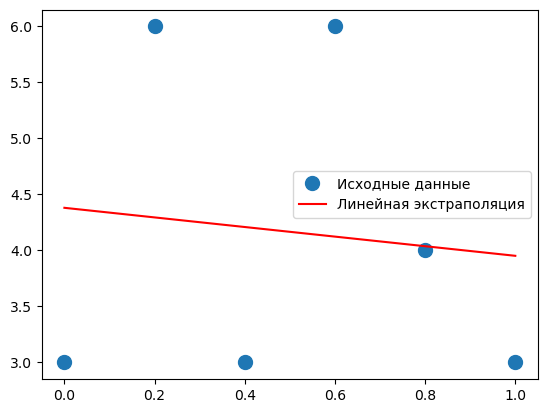

In [9]:
plt.plot(x, y, 'o', label = 'Исходные данные', markersize=10)
plt.plot(x, m * x + c, 'r', label = 'Линейная экстраполяция')
plt.legend()
plt.show()

In [13]:
m = np.vstack((x ** 2, x, np.ones(6))).T
s=np.linalg.lstsq(m, y, rcond = None)[0]
s

array([-7.14285714,  6.71428571,  3.42857143])

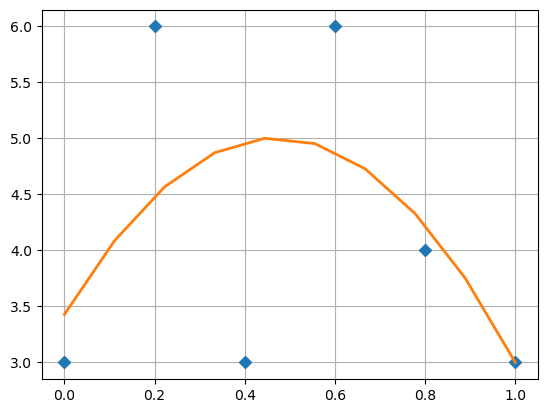

In [15]:
x_prec = np.linspace(-0, 1, 10)
plt.plot(x, y, 'D')
plt.plot(x_prec, s[0] * x_prec ** 2 + s[1] * x_prec + s[2], '-', lw = 2)
plt.grid()
plt.savefig('полином.png')